## 이번 주 목표_이미지 변형                 
---           

1. 색상 공간 변환      
2. 이진화      
3. 이미지 연산       
4. 영상의 밝기 조절

## 이미지 변형           
---

- 이번에는 __이미지 데이터에 변형을 주는 연산을 시도해보자.__         
- 데이터 변형은 주로          
    1. 특징을 검출하고        
    2. 데이터를 해석하기 위한        
  전처리 과정으로 활용한다.            
- 전처리를 수행하는 연산은 종류가 매우 다양하며, 특별히 용도가 구분되어 있지 않아 전처리에서 사용된 연산이 데이터를 해석할 용도로,      
- 데이터를 해석하는 연산이 전처리에 사용할 용도로 바뀌어 사용되기도 한다.         

- 이번 장에서는 전처리 알고리즘에서 가장 많이 활용되는 __색상 공간 변화, 이진화__ 에 대해 알아본다.    
- (책에서는 이미지 연산, 흐림 효과도 함께 다루나 종류별로 학습하기 위해 이번 과제에서는 배제한다.)      

### 1. 색상 공간 변화           
---

__색상 공간 변환은 본래의 색상 공간에서 다른 색상 공간으로 변환할 때 사용된다.__        

1. 색상 공간 변환 함수는 데이터 타입을 같게 유지하고, 채널을 변환한다.          
2. 8비트, 16비트, 32비트의 이미지를 입력으로 넣어, 동일한 정밀도의 이미지를 출력으로 받는다.       
3. 채널 수가 감소하여 이미지 내부의 데이터는 설정한 색상 공간과 일치하는 값으로 변환되어, 데이터 값이 변경되거나 채널 순서가 변경될 수 있다.

> Q1. python opencv의 색상 공간 변환 함수는 어떻게 생겼나요?

> dst = cv2.cvtColor(src, code, dstCn=None)

입력 이미지 = cv2.cvtColor(입력이미지, 색상변환코드, 출력 채널)

색상 공간 변환 함수는 

1. 입력 이미지(src)에     
2. 색상 변환 코드(code)를 적용해       
3. 출력 이미지(dst)로 변환한다.

- 색상 변환 코드를 사용해 BGR공간을 RGBA채널로 변환하거나, 그레이스케일, HSV, CIE Luv등 다양한 채널로 변환 가능하다.  
- 변환하려는 채널은 단일채널(그레이스케일) -------------------------------> 4채널(RGBA)등 다양한 수 변경이 가능하다.      
- 출력 채널(dstCn)은 출력할 이미지에 적용할 채널 수를 설정한다. 매개변수의 값이 0이면, 입력 이미지와 색상 변환 코드를 적용하여 자동으로 변형된다.          

> Q2. 예제 5.2와 표 5.1을 참고하여, 하나의 이미지를 불러온 후 색상 공간을 변환해보세요.

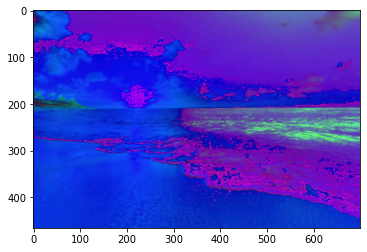

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/ShowMeTheCV/Jeongeun/PostingPic/see.jpg'

src = cv2.imread(image_path)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

plt.imshow(dst)

- HSV공간으로 변환하게 되면, H(Hue)는 0~180까지의 정밀도를 가지므로 이미지가 깨진 것처럼 보이게 된다.

> Q3. 색상 공간에서 각 비트(8, 16, 32)별로 적용되는 범위는 어떻게 다른가요? 이 범위가 의미하는 차이가 무엇인가요? 

BGR에서, 각 채널의 표현 범위는 0~255이지만 H 채널의 경우는 유일하게 0~180까지만 표현된다.    
- Hue의 값은 일반적으로 0~360까지 표현되기 때문에, 아래의 식에 대입할 경우 표현하는 범위인 0~255 를 넘어버리게 된다.      
- 이를 방지하기 위해 H채널은 0~180까지로 줄여 표현한다.

- $Y = 0.299 X R + 0.587 X G + 0.114 X B$            

1. 이렇게 색상 공간을 변환하다 보면, HSV/HSL 공간은 8비트 이미지로 0~255값까지만 표현하는데      
2. 안에 들어가는 값이 255값을 넘어가는 문제가 발생하게 된다.      
3. 이를 방지하기 위해 HSV값은 0~180 값으로 제한하여 사용한다.

### 1-1. HSV 색상공간          
---

![색상공간](./PostingPic/4_HSV.png)

- HSV(Hue, Saturation, Value) 공간은 색상을 표현하기에 가장 간편한 색상 공간이다.        
- 이미지에서 색상을 검출한다고 할 때, BGR이나 RGB로는 인간이 인지하는 영역의 색깔을 구분하기에는 매우 어렵고 복잡하다.   
- 하지만, HSV 공간을 활용하면 간편하고 빠르게 __특정 색상을 검출하고 분류할 수 있다.__ 

1. Hue(색상) : 색깔의 질을 의미한다. 빨강, 노랑, 파랑 등으로 나타내는 성질이다.     
2. Saturation(채도) : 색의 선명도로, 탁한 색이 얼마나 섞이지 않았는지를 설명한다. (색에 흰색이나 다른 요소가 포함되어 있으면 탁하다)   
3. Value(명도) : 색의 밝기이며, 높을수록 백색, 낮을수록 흑색에 가까워진다. 

![고명도저명도](./PostingPic/4_고명도저명도.jpg)

- 위의 그림에서, 가로축으로 왼쪽이 저채도, 오른쪽이 고채도이다.
- 위의 그림에서, 왼편의 세로축이 "명도" 이다

#### 한 가지 색깔만 검출하기

- 각 색 속성의 양 끝단을 연결하면 보편적인 원형의 형태가 된다.        
- 이 때, 0~180(Hue)의 값에서 "빨간색" 만 검출하려면 0만 쓰면 될까? 180만 쓰면 될까?    
- 정답은 __두 번에 걸쳐 색상 채널을 나누고 합치는 연산을 하여 구한다__      

1. 빨간색 계열을 나눠 낮은 쪽의 빨간채널, 높은 쪽의 빨간 채널을 만든다.   
2. 채널을 합산한다.    

- 이 경우, 색상 공간을 채널별로 나누는데, 이는 관심채널 설정과 비슷하지만 모든 채널에서 약간씩 포함된 빨간색을 가져와야 한다.

> Q4. python opencv의 채널 분리 함수는 어떻게 표현되나요? 각각의 요소는 무엇을 의미하나요? 

> mv = cv2.split(src,)          
> 분리된 이미지 = cv2.split(입력 이미지, )

- 채널 분리 함수는 다중 채널 입력 이미지(src)를 단일 채널 이미지 배열(mv)로 바꾼다.         
- 분리된 mv는 세 개의 결과 이미지로 생성된다. mv[0], mv[1], mv[2]    

> Q5. python opencv의 채널 병합 함수는 어떻게 표현되나요? 각각의 요소는 무엇을 의미하나요?

> dst = cv2.merge(mv)            
병합된 이미지 = cv2.merge(단일채널[채널1, 채널2, 채널3])

- 채널 병합 함수는 단일채널 이미지배열(mv)을 병합해 하나의 출력 이미지(dst)로 만든다. 
- mv 배열 안에는 1,2,3채널(mv[0], mv[1], mv[2])이 포함되어야 한다.   
- 또한, __mv배열의 첫번째 채널(mv[0])이 기준이 되어 모든 채널의 속성이 이 채널과 일치해야 한다.__      
- 채널 분리, 병합 함수는 __4채널까지 처리 가능하다__  

#### 원점으로 돌아가서,   

- 다중 채널 이미지에서 단일 채널을 갖는 이미지로 분리한 후          
- 해당 채널에서 특정 채널의 값을 검출해야 한다.

> Q6. 배열 요소의 범위 설정 함수를 적어보고, 각 의미를 알려주세요.

> dst = cv2.inRange(src, lowerb, upperb)           
배열 = cv2.inRange(이미지, 낮은 범위, 높은 범위)

- 입력 이미지(src)에서 낮은 범위~높은 범위의 요소를 검출한다.

> Q7. 이미지를 하나 불러와서, 특정 색상만 검출해보세요. 예제 5.4를 참고하세요.

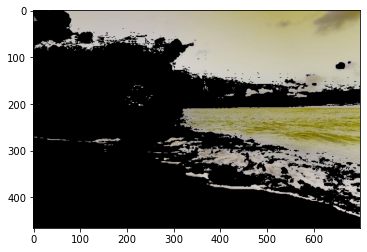

In [11]:
import cv2
import os

selected_image = os.getenv('HOME')+'/ShowMeTheCV/Jeongeun/PostingPic/색상검출.png'

image = cv2.imread(selected_image)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)       

#채널 분리 함수를 통해 h,s,v 각 채널을 분리함
h, s, v = cv2.split(hsv)

#마스크를 설정(표 5.2의 Hue 색상 파라미터를 참고)
h_blue = cv2.inRange(h, 85, 120)

dst = cv2.bitwise_and(hsv, hsv, mask=h_blue)
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

plt.imshow(dst)

> Q8. python opencv의 배열 병합 함수를 적어보세요.

> dst = cv2.addWeighted(src1, alpha, src3, beta, gamma, dtype=None)    

> $dst = src1 * alpha + src2 * beta + gamma$            

- src1, src2 : 분리한 채널 이미지    
- 알파블렌딩(오버레이하듯 연하게 겹치는 것)을 활용하여 서로 다른 이미지를 불투명하게 혼합해서 표시한다.   

> Q9. 예제 5.6을 수행하여 위의 이미지에서 하나의 색상값을 완벽히 추출해보세요.

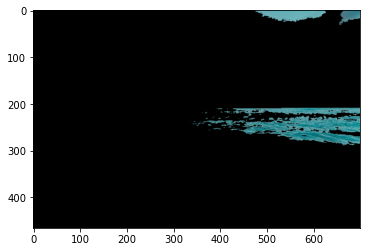

In [13]:
#RGB니까..
cyan = cv2.inRange(hsv, (85,100,100), (110,255,255))
blue= cv2.inRange(hsv, (85,100,100), (120,255,255))
blue_weight = cv2.addWeighted(cyan, 1.0, blue, 1.0, 0.0)

dst=cv2.bitwise_and(hsv, hsv, mask=blue_weight)
dst=cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

#요 부분을 추가했습니다
dst=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(dst)

- 왜 하나의 색상값이 정확히 출력되지 않았을까요?           
- cvtColor하고 나서 잘 출력됐습니다~

## 2. 이진화          
---

- 영상/동영상의 어느 지점을 기준으로, 픽셀을 분류해서 제외해야 할 때가 있다.      
- 이 때 __특정 값을 기준으로 값이 높은 픽셀을 검은색, 낮은 픽셀을 흰색으로 변경한다.__      

- __기준값에 따라 픽셀을 이분법적으로 구분해 픽셀을 참/거짓으로 나누는 연산이다.__    

> Q10. python opencv의 이진화 함수는 어떻게 표현되나요? 각 옵션에 대해서도 설명해 주세요.

> retval, dst = cv2.threshold(src, thresh, maxval, type)       
- 설정 임계값, 출력 이미지 = cv2.threshold(입력이미지, 임계값, 최댓값, 임계값 형식)

> Q11. 예제 5.8을 수행해보세요.

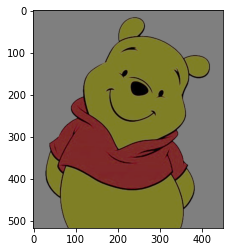

In [25]:
image_path = os.getenv('HOME') + '/ShowMeTheCV/Jeongeun/PostingPic/pooh.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#임계값을 버림
#임계값을 초과하면 0, 아닐 경우 maxval
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)

plt.imshow(binary)

> Q12. 이진화 함수에는 다양한 임계값 형식이 있습니다. 이 임계값 형식은 활성화 함수처럼 특정 값과의 경계를 두고 활성화시켜주는데요, 어떤 옵션들이 있는지 그림 5.5로 확인해보고, 가장 마음에 드는 임계값 옵션을 설명해주세요.

TRUNC - 잘라내다라는 의미대로, 적용되는 부분에만 적용하고 아니면 아무것도 하지 않음.

#### 1. 오츠 알고리즘            

- 입력된 이미지의 밝기 분포(히스토그램)를 통해 최적의 임곗값을 찾아 이진화를 적용하는 알고리즘   
- 가능한 모든 값을 시험해보고, 이미지 내의 픽셀을 두 개의 클래스로 분류했을 때 클래스 간의 분산을 최소화하거나 차이를 최대화하는 값을 찾는다.      
- 다음 수식을 써서, 수식을 최소화하는 임곗값을 찾는다.

> ${\sigma}^2 \equiv \sigma * \sigma_1^2 + \beta * \sigma_2^2$

- 이 경우, 가능한 모든 경우를 시험해보므로 다른 알고리즘에 비해 느리다.

#### 2. 삼각형 알고리즘             

- 오츠 알고리즘과 동일하게 모든 입력된 이미지의 밝기 분포를 통해, 최적의 임계값을 찾아 이진화를 적용하는 알고리즘이지만     
- __오츠 알고리즘과는 다르게 모든 값을 대입하지는 않는다.__        

- 히스토그램에서 최대 거리를 구성할 수 있는 임계값을 찾아 이진화를 적용한다.

### 3. 적응형 이진화 알고리즘       

- 입력 이미지에 따라 임곗값이 스스로 다른 값을 할당할 수 있도록 구성된 알고리즘.        
- 이미지에 따라 어떤 값을 주던지, 이진화 처리가 어려운 이미지가 존재한다.          
- 조명의 변화나 반사가 심한 경우     
- __이미지 내의 밝기 분포가 달라 다 다른 임계값을 적용해야 하는 경우__  

$T(x,y) = \frac{1}{blocksize^2} \sum_{xi} \sum_{yi}I(x + x_i, y+y_i) -c $

- 이진화 함수에서 일반적으로 사용하는 최댓값 플리그와 임계값 형식 플래그를 동일하게 사용한다.        
- 각 픽셀 주변의 blocksize영역에 대한 가중 평균을 계산한다.

> Q13. 예제 5.9를 통해 조명이 심한 이미지에 적응형 이진화를 적용해보세요.

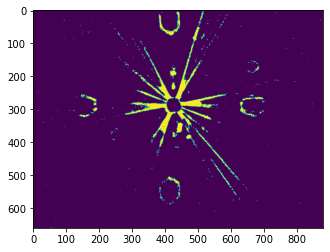

In [29]:
new_image_path = os.getenv('HOME') + '/ShowMeTheCV/Jeongeun/PostingPic/highlight.jpg'

image = cv2.imread(new_image_path)
plt.imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#(image, maxvla, adaptivemethod, trasholdType, blockSize, c)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, -5)

plt.imshow(binary)

## 3. 이미지 연산             
---

__이미지 연산은 하나 또는 둘 이상의 이미지에 대해 수학적 연산을 수행하는 것이다.__        

1. 덧셈 함수        
2. 뺄셈 함수       
3. 곱셈 함수        
4. 나눗셈 함수        
5. 최댓값 함수       
6. 최솟값 함수      
7. 절댓값 함수     
8. 절댓값 차이 함수       
9. 비교 함수         
10. 선형 방정식 시스템의 해 찾기 함수        
11. AND 연산 함수        
12. OR 연산 함수        
13. XOR 연산 함수          
14. NOT 연산 함수       

### 1. 덧셈 함수

> Q14. python opencv 덧셈 함수의 표현 방식을 적어보세요.

> dst = cv2.add(src1, src2, mask=None, dtype=None)           

- 덧셈 함수는 배열과 배열, 배열과 스칼라의 요소별 합을 계산한다.(아다마르 곱처럼!)      
- src1와 src2의 각 요소를 더한 결과를 dst에 저장한다.   
- 정밀도에 따라 요소의 최대값과 최소값이 있지만, __최대값을 넘어가거나 최소값보다 낮아질 수 없다.__         
- 덧셈 함수는 최댓값을 넘어가기 쉽기 때문에, 두 배열의 요소를 잘 고려해야 한다.

> Q15. python opencv 뺄셈 함수의 표현 방식을 적어보세요.

> dst = cv2.subtract(src1, src2, mask=None, dtype=None)      

- 덧셈과 유사하지만, 뺄셈 함수는 빼는 순서가 중요하므로 이에 유의한다.

> Q16. python opencv 곱셈 함수의 표현 방식을 적어보세요. 

> dst = cv2.multiply(src1, src2, mask=None, dtype=None)      

- 배열과 배열, 배열과 스칼라의 요소별 곱에 scale을 곱한 값을 계산한다.     
- 정밀도가 정수형일 때 소수점 단위는 버림 처리한다.

> Q17. python opencv 나눗셈 함수의 표현 방식을 적어보세요.

> dst = cv2.divide(src1, src2, mask=None, dtype=None)      

- 나눗셈 함수 역시 곱셈함수와 동일하다.

> Q18. python opencv 최대값 함수의 표현 방식을 적어보세요.     

> dst = cv2.max(src1, src2)

> Q19.python opencv 최솟값 함수의 표현 방식을 적어보세요.

> dst = cv2.min(src1, src2)

> Q20. python opencv 절대값 함수의 특별한 점은 무엇입니까?

- 절대값 함수가 없어서, numpy 라이브러리의 절대값 함수를 빌려쓴다.

> Q21. python opencv 절댓값 차이 함수의 표현 방식을 적어보세요.

dst = np.abs(src)

- 절댓값 차이 함수는 덧셈 함수나 뺄셈 함수 등에서 요소의 최댓값보다 크거나 최솟값보다 작을 때 발생하는 오버/언더플로우 문제를 피할 수 있다.

> Q22. python opencv 비교 함수의 표현 방식을 적어보세요.

dst = cv2.absdiff(src1, src2)

- 비교 함수는 cmpop 매개 변수를 활용해 모든 요소에 대해 일대일 비교 연산을 수행한다.     
- 비교결과가 True이면 값을 255로, 비교결과가 False이면 값을 0으로 변경한다.

> Q23. python opencv 선형 방정식 시스템의 해 찾기 함수의 표현 방식을 적어보세요.

success, dst = cv2.solve(src1, src2, flags=None)

> Q24. python opencv AND연산 함수의 표현 방식을 적어보세요.

dst = cv2.bitwise_and(src1, src2, mask=None)

> Q25. python opencv OR연산 함수의 표현 방식을 적어보세요.

dst = cv2.bitwise_or(src1, src2, mask=None)

> Q26. python opencv XOR연산 함수의 표현 방식을 적어보세요.

dst = cv2.bitwise_xor(src1, src2, mask=None)

> Q27. python opencv NOT연산 함수의 표현 방식을 적어보세요.

dst = cv2.bitwise_not(src1, src2, mask=None)

> Q28. AND, OR, XOR, NOT 연산에 대해 설명해주세요.        

- AND : 둘 다 참일때
- OR : 둘 중 하나라도 참일때(둘다 참일때를 포함)
- XOR : 둘이 안맞을때
- NOT : 비트를 뒤집는다

이미지 연산이 왜 필요한가?    

-비트와이즈 연산은 두 이미지를 합성할 때 특정 영역만 선택하거나 특정 영역만 제외하는 등의 선별적인 연산에 도움이 됩니다.
[이 블로그 설명 참조](https://bkshin.tistory.com/entry/OpenCV-9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B0%EC%82%B0)

## 4. 영상의 밝기 조절(얼룩말책이 아닌 참고도서)          
---

- 디지털 카메라로 사진을 찍다 보면 어둡거나 너무 밝게 사진이 찍히는 경우가 있다.         
- 이런 경우, 간단한 영상 처리 기법을 이용하여 밝기 조절을 구현할 수 있다.      
- __영상의 밝기 조절은 행렬의 덧셈과 뺄셈 연산을 이용하여 매우 간단히 구현할 수 있다.__      

1. 영상의 밝기 조절이란, 영상의 전체적인 밝기를 조절하여 밝거나 어두운 영상을 만드는 작업이다.      
2. 영상 밝기 조절을 위해서는 __모든 픽셀에 일정 값을 더하거나 뺍니다. 양수값을 더하면 영상이 밝아지고, 양수값을 빼면 영상이 어두워진다.__         
3. 영상의 밝기 조절을 수식으로 표현하면 다음과 같다.           

> $ dst(x,y) = src(x,y) + n $            

4. 하지만, 영상의 최대값(정밀도)은 정해져 있기 때문에, 값의 범위를 벗어나는 경우 해당 자료형의 최솟값/최댓값으로 원소 값을 설정하는 연산을 __포화연산(saturate)이라고 부르고, 이를 적용하여 밝기 조절을 수행한다.__         

> $ dst(x,y) = saturate(src(x,y)+n)         

In [ ]:
#아래의 소스코드를 해석하고, 수행해봅시다.
import numpy as np
import cv2


def brightness1():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    dst = cv2.add(src, 100)

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def brightness2():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    dst = np.empty(src.shape, src.dtype)
    for y in range(src.shape[0]):
        for x in range(src.shape[1]):
            dst[y, x] = src[y, x] + 100

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def saturated(value):
    if value > 255:
        value = 255
    elif value < 0:
        value = 0

    return value


def brightness3():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    dst = np.empty(src.shape, dtype=src.dtype)
    for y in range(src.shape[0]):
        for x in range(src.shape[1]):
            dst[y, x] = saturated(src[y, x] + 100)

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def brightness4():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    def update(pos):
        dst = cv2.add(src, pos)
        cv2.imshow('dst', dst)

    cv2.namedWindow('dst')
    cv2.createTrackbar('Brightness', 'dst', 0, 100, update)
    update(0)

    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    brightness1()
    brightness2()
    brightness3()
    brightness4()